# Notebook #1: EDA

In [42]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import pickle

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_preprocesamiento as sp

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Como primer paso, cargaremos los tres DFs con los datos:

In [43]:
df_employee_survey = pd.read_csv("../../datos/origen/employee_survey_data.csv")
df_manager_survey = pd.read_csv("../../datos/origen/manager_survey_data.csv")
df_general = pd.read_csv("../../datos/origen/general_data.csv")

In [6]:
df_employee_survey.head(2)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0


In [7]:
df_manager_survey.head(2)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


In [8]:
df_general.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4


- Comprobamos que todos contienen la misma cantidad de empleados (valores únicos)

In [9]:
df_general["EmployeeID"].nunique()

4410

In [10]:
df_employee_survey["EmployeeID"].nunique()

4410

In [11]:
df_manager_survey["EmployeeID"].nunique()

4410

- Dado que todos contienen la misma cantidad, procedemos una unirlos con un merge.

In [44]:
df = pd.merge(df_general, df_employee_survey, how="inner")
df = pd.merge(df, df_manager_survey, how="inner")

In [55]:
df['Age'].mean()

np.float64(36.923809523809524)

In [13]:
df.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3


- Respecto a las columnas, si lo que se desea predecir es la probabilidad de que un empleado abandone o no la empresa, parece que todas podrían guardar relación con esta predicción. De momento, las mantendremos todas, excepto aquellas en hay una única categoría. Esas columas son "Over18", "EmployeeCount" y "StandardHours".

- Por su parte, los "EmployeeID" los eliminaremos también, dado que corresponden a identificadores únicos, con lo cual, harían demasiado específicas las predicciones.

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [15]:
df["Over18"].nunique()

1

In [16]:
df["EmployeeCount"].nunique()

1

In [17]:
df["StandardHours"].nunique()

1

In [18]:
df.drop(columns = ["Over18", "EmployeeCount", "StandardHours", "EmployeeID"], inplace=True)

In [19]:
sp.exploracion_dataframe(df, "Attrition")

El número de datos es 4410 y el de columnas es 25

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 2837

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
NumCompaniesWorked,0.430839
TotalWorkingYears,0.204082
EnvironmentSatisfaction,0.566893
JobSatisfaction,0.453515
WorkLifeBalance,0.861678



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Age,int64
Attrition,object
BusinessTravel,object
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
Gender,object
JobLevel,int64
JobRole,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ATTRITION tiene las siguientes valore únicos:


,count
Attrition,
No,3699
Yes,711


La columna BUSINESSTRAVEL tiene las siguientes valore únicos:


,count
BusinessTravel,
Travel_Rarely,3129
Travel_Frequently,831
Non-Travel,450


La columna DEPARTMENT tiene las siguientes valore únicos:


,count
Department,
Research & Development,2883
Sales,1338
Human Resources,189


La columna EDUCATIONFIELD tiene las siguientes valore únicos:


,count
EducationField,
Life Sciences,1818
Medical,1392
Marketing,477
Technical Degree,396
Other,246


La columna GENDER tiene las siguientes valore únicos:


,count
Gender,
Male,2646
Female,1764


La columna JOBROLE tiene las siguientes valore únicos:


,count
JobRole,
Sales Executive,978
Research Scientist,876
Laboratory Technician,777
Manufacturing Director,435
Healthcare Representative,393


La columna MARITALSTATUS tiene las siguientes valore únicos:


,count
MaritalStatus,
Married,2019
Single,1410
Divorced,981



 ..................... 

Los principales estadísticos de las columnas categóricas para el NO son: 


,count,unique,top,freq
Attrition,3699,1,No,3699
BusinessTravel,3699,3,Travel_Rarely,2661
Department,3699,3,Research & Development,2430
EducationField,3699,6,Life Sciences,1515
Gender,3699,2,Male,2205
JobRole,3699,9,Sales Executive,813
MaritalStatus,3699,3,Married,1767



 ..................... 

Los principales estadísticos de las columnas numéricas para el NO son: 


,count,mean,std,min,25%,50%,75%,max
Age,3699.0,37.561233,8.885956,18.0,31.0,36.0,43.0,60.0
DistanceFromHome,3699.0,9.227088,8.167978,1.0,2.0,7.0,14.0,29.0
Education,3699.0,2.919708,1.025784,1.0,2.0,3.0,4.0,5.0
JobLevel,3699.0,2.068938,1.115967,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,3699.0,65672.595296,47472.814021,10510.0,29360.0,49300.0,86060.0,199990.0
NumCompaniesWorked,3684.0,2.648480,2.460537,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,3699.0,15.157340,3.634551,11.0,12.0,14.0,18.0,25.0
StockOptionLevel,3699.0,0.796431,0.850621,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,3692.0,11.860780,7.762536,0.0,6.0,10.0,16.0,38.0
TrainingTimesLastYear,3699.0,2.827251,1.311493,0.0,2.0,3.0,3.0,6.0



 ..................... 

Los principales estadísticos de las columnas categóricas para el YES son: 


,count,unique,top,freq
Attrition,711,1,Yes,711
BusinessTravel,711,3,Travel_Rarely,468
Department,711,3,Research & Development,453
EducationField,711,6,Life Sciences,303
Gender,711,2,Male,441
JobRole,711,9,Sales Executive,165
MaritalStatus,711,3,Single,360



 ..................... 

Los principales estadísticos de las columnas numéricas para el YES son: 


,count,mean,std,min,25%,50%,75%,max
Age,711.0,33.607595,9.675693,18.0,28.0,32.0,39.0,58.0
DistanceFromHome,711.0,9.012658,7.772368,1.0,2.0,7.0,15.0,29.0
Education,711.0,2.877637,1.014233,1.0,2.0,3.0,4.0,5.0
JobLevel,711.0,2.037975,1.057485,1.0,1.0,2.0,2.0,5.0
MonthlyIncome,711.0,61682.616034,44792.067695,10090.0,28440.0,49080.0,71040.0,198590.0
NumCompaniesWorked,707.0,2.936351,2.678774,0.0,1.0,1.0,5.0,9.0
PercentSalaryHike,711.0,15.481013,3.775289,11.0,12.0,14.0,18.0,25.0
StockOptionLevel,711.0,0.780591,0.858899,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,709.0,8.255289,7.164018,0.0,3.0,7.0,10.0,40.0
TrainingTimesLastYear,711.0,2.654008,1.154834,0.0,2.0,3.0,3.0,6.0


- Para nuestro conjunto podemos ver que, tenemos 2837 datos duplicados

- Además, tenemos un bajo porcentaje de nulos en 5 columnas, todas por debajo del 1%. Dada esta situación, procederemos a eliminarlos del conjunto de datos para el primer modelo.

In [20]:
df.dropna(inplace=True)

- Comprobamos desbalanceo:

In [21]:
round((df["Attrition"] == "Yes").sum() / df.shape[0], 2)

np.float64(0.16)

- En lo que respecta a la variable respuesta u objetivo, sabemos que es "Attrition", con valores binarios de "Yes" y "No", y hace referencia a cuando un empleado se ha marchado o no de la empresa. Como observación adicional, vemos que hay un desbalanceo importante, siendo los Yes sólamente un 16%, lo cual tiene sentido.

In [22]:
df_num, df_cat = sp.separar_dataframe(df)

In [23]:
df_num

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,6,2,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,10,1,1,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,17,4,4,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,2,5,3,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,10,1,1,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,4,3,2,35390,1.0,18,0,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,5,4,1,60290,3.0,17,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,2,4,1,26790,2.0,15,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,25,2,2,37020,0.0,20,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4


- Realizaremos un análisis de las variables numéricas:

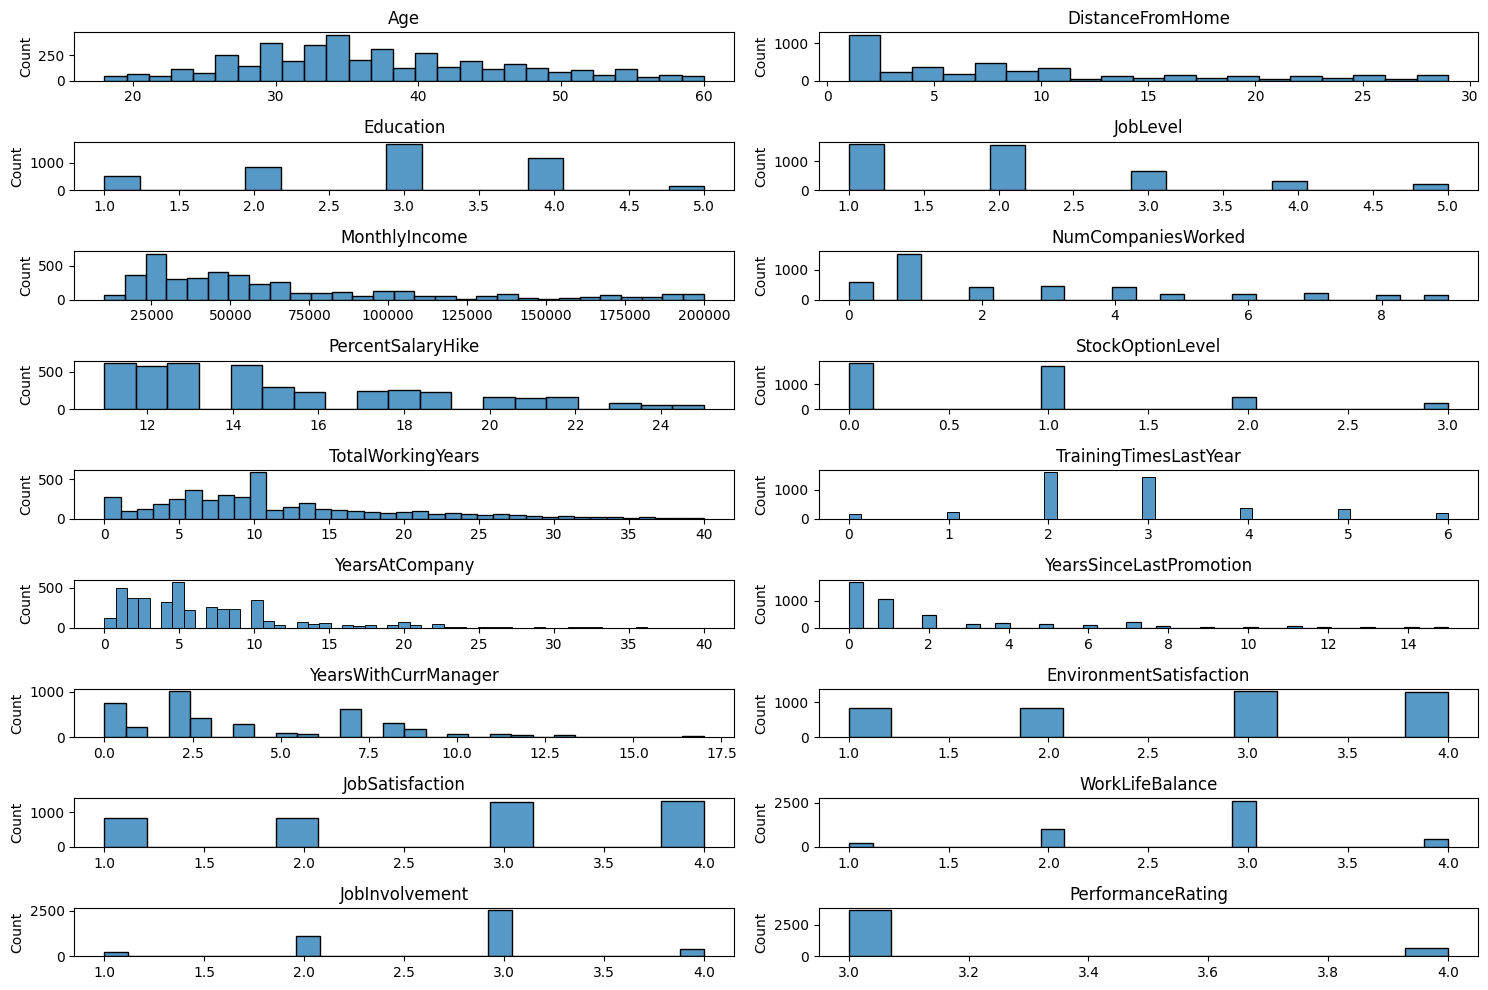

In [24]:
sp.plot_numericas(df_num)

- Cuando no tenemos continuidad, nos da idea de que una variable, aunque es numérica, se comporta como categórica. Por su comportamiento, gestionaremos ahora los tipos de variables:

| Variable                 | Tipo de Variable   |
|--------------------------|--------------------|
| Age                      | Numérica           |
| Attrition                | Categórica         |
| BusinessTravel           | Categórica         |
| Department               | Categórica         |
| DistanceFromHome         | Numérica           |
| Education                | Categórica           |
| EducationField           | Categórica         |
| Gender                   | Categórica         |
| JobLevel                 | Numérica           |
| JobRole                  | Categórica         |
| MaritalStatus            | Categórica         |
| MonthlyIncome            | Numérica           |
| NumCompaniesWorked       | Numérica           |
| PercentSalaryHike        | Numérica           |
| StockOptionLevel         | Categórica           |
| TotalWorkingYears        | Numérica           |
| TrainingTimesLastYear    | Categórica           |
| YearsAtCompany           | Numérica           |
| YearsSinceLastPromotion  | Numérica           |
| YearsWithCurrManager     | Numérica           |
| EnvironmentSatisfaction  | Categórica         |
| JobSatisfaction          | Categórica         |
| WorkLifeBalance          | Categórica         |
| JobInvolvement           | Categórica         |
| PerformanceRating        | Categórica         |

- Realizamos la conversión:

In [25]:
df[['Education', 'JobLevel', 'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']] = df[['Education', 'JobLevel', 'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']].astype(str)

- Vamos a analizar ahora las variables categóricas, separando nuevamente el DF según la nueva clasificiación.

In [26]:
df_num, df_cat = sp.separar_dataframe(df)

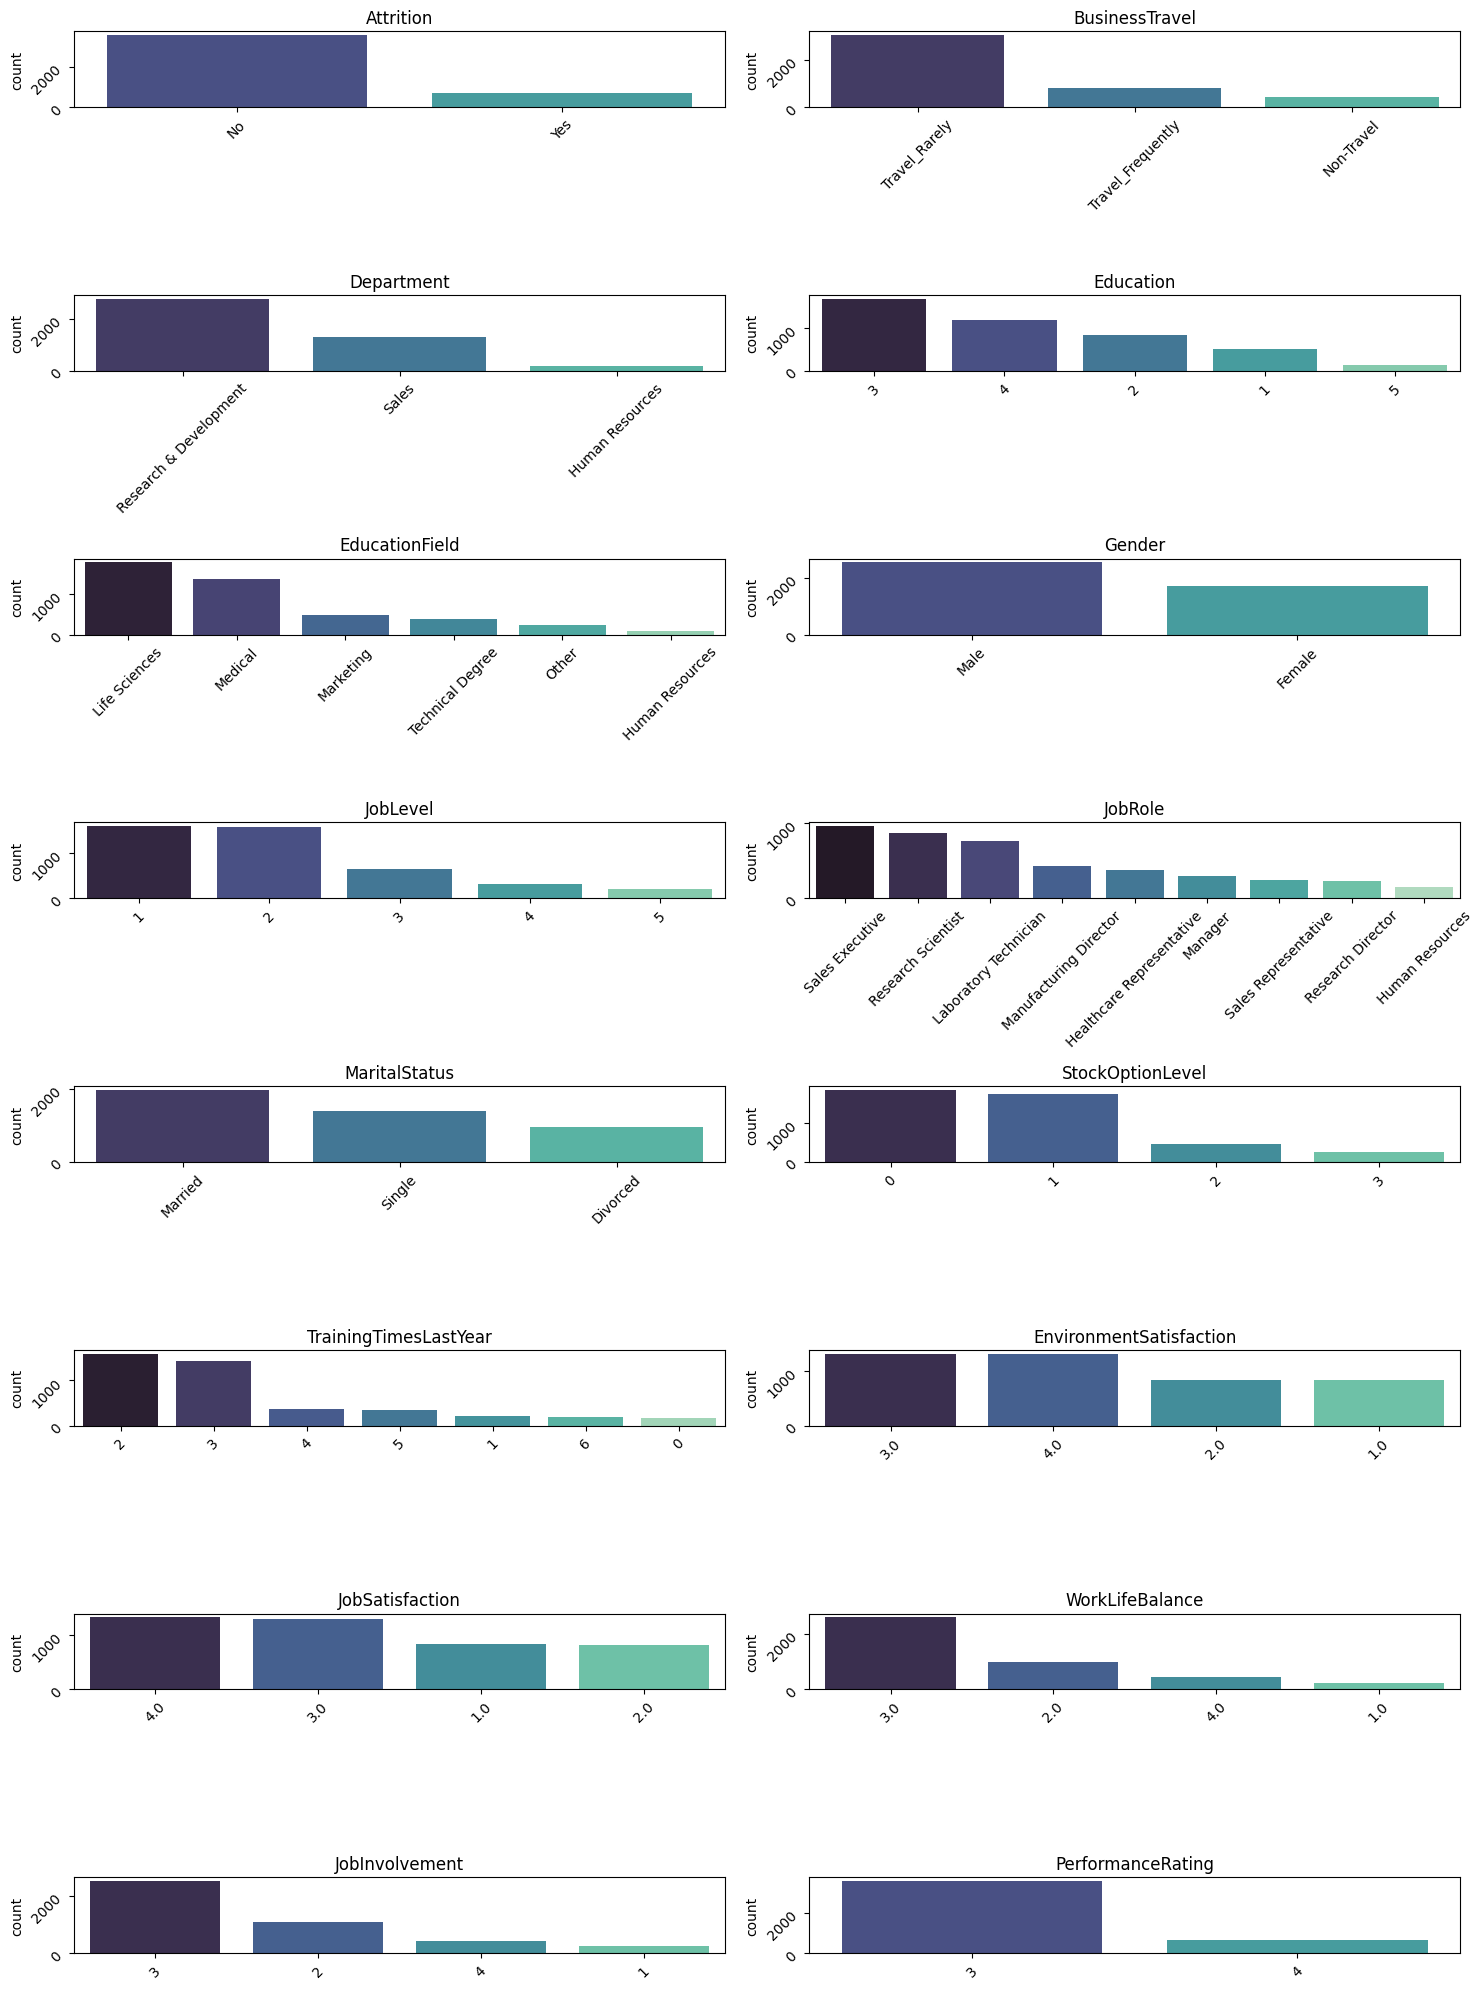

In [27]:
sp.plot_cat(df_cat, tamano_grafica=(15,20))

- Con las columnas ya convertidas, podemos ver que, las variables se encuentran en general repartidas entre categorías, estando algunas de las mayores diferencias en, como mencionamos anteriormente, la variable respuesta -"attrition"-, donde, con los no acaparando un 84% de los valores.

- Analizaremos ahora la relación numéricas-categóricas:

In [28]:
df_num

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,6,131160,1.0,11,1.0,1,0,0
1,31,10,41890,0.0,23,6.0,5,1,4
2,32,17,193280,1.0,15,5.0,5,0,3
3,38,2,83210,3.0,11,13.0,8,7,5
4,32,10,23420,4.0,12,9.0,6,0,4
...,...,...,...,...,...,...,...,...,...
4404,29,4,35390,1.0,18,6.0,6,1,5
4405,42,5,60290,3.0,17,10.0,3,0,2
4406,29,2,26790,2.0,15,10.0,3,0,2
4407,25,25,37020,0.0,20,5.0,4,1,2


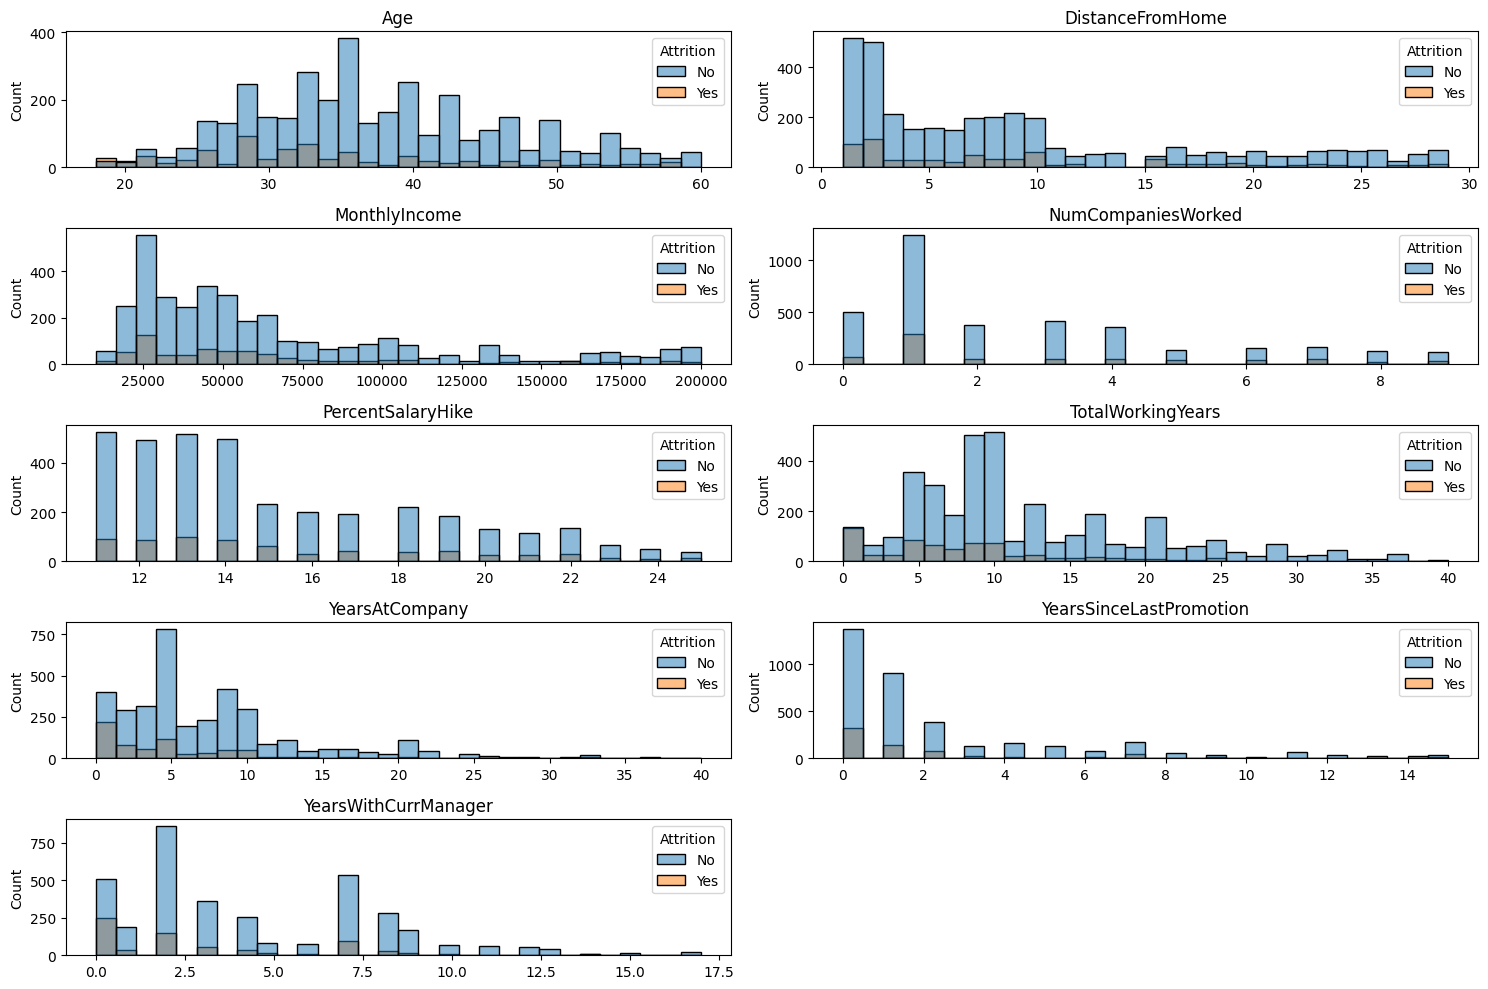

In [29]:
sp.relacion_var_numericas_problem_cat(df, "Attrition")

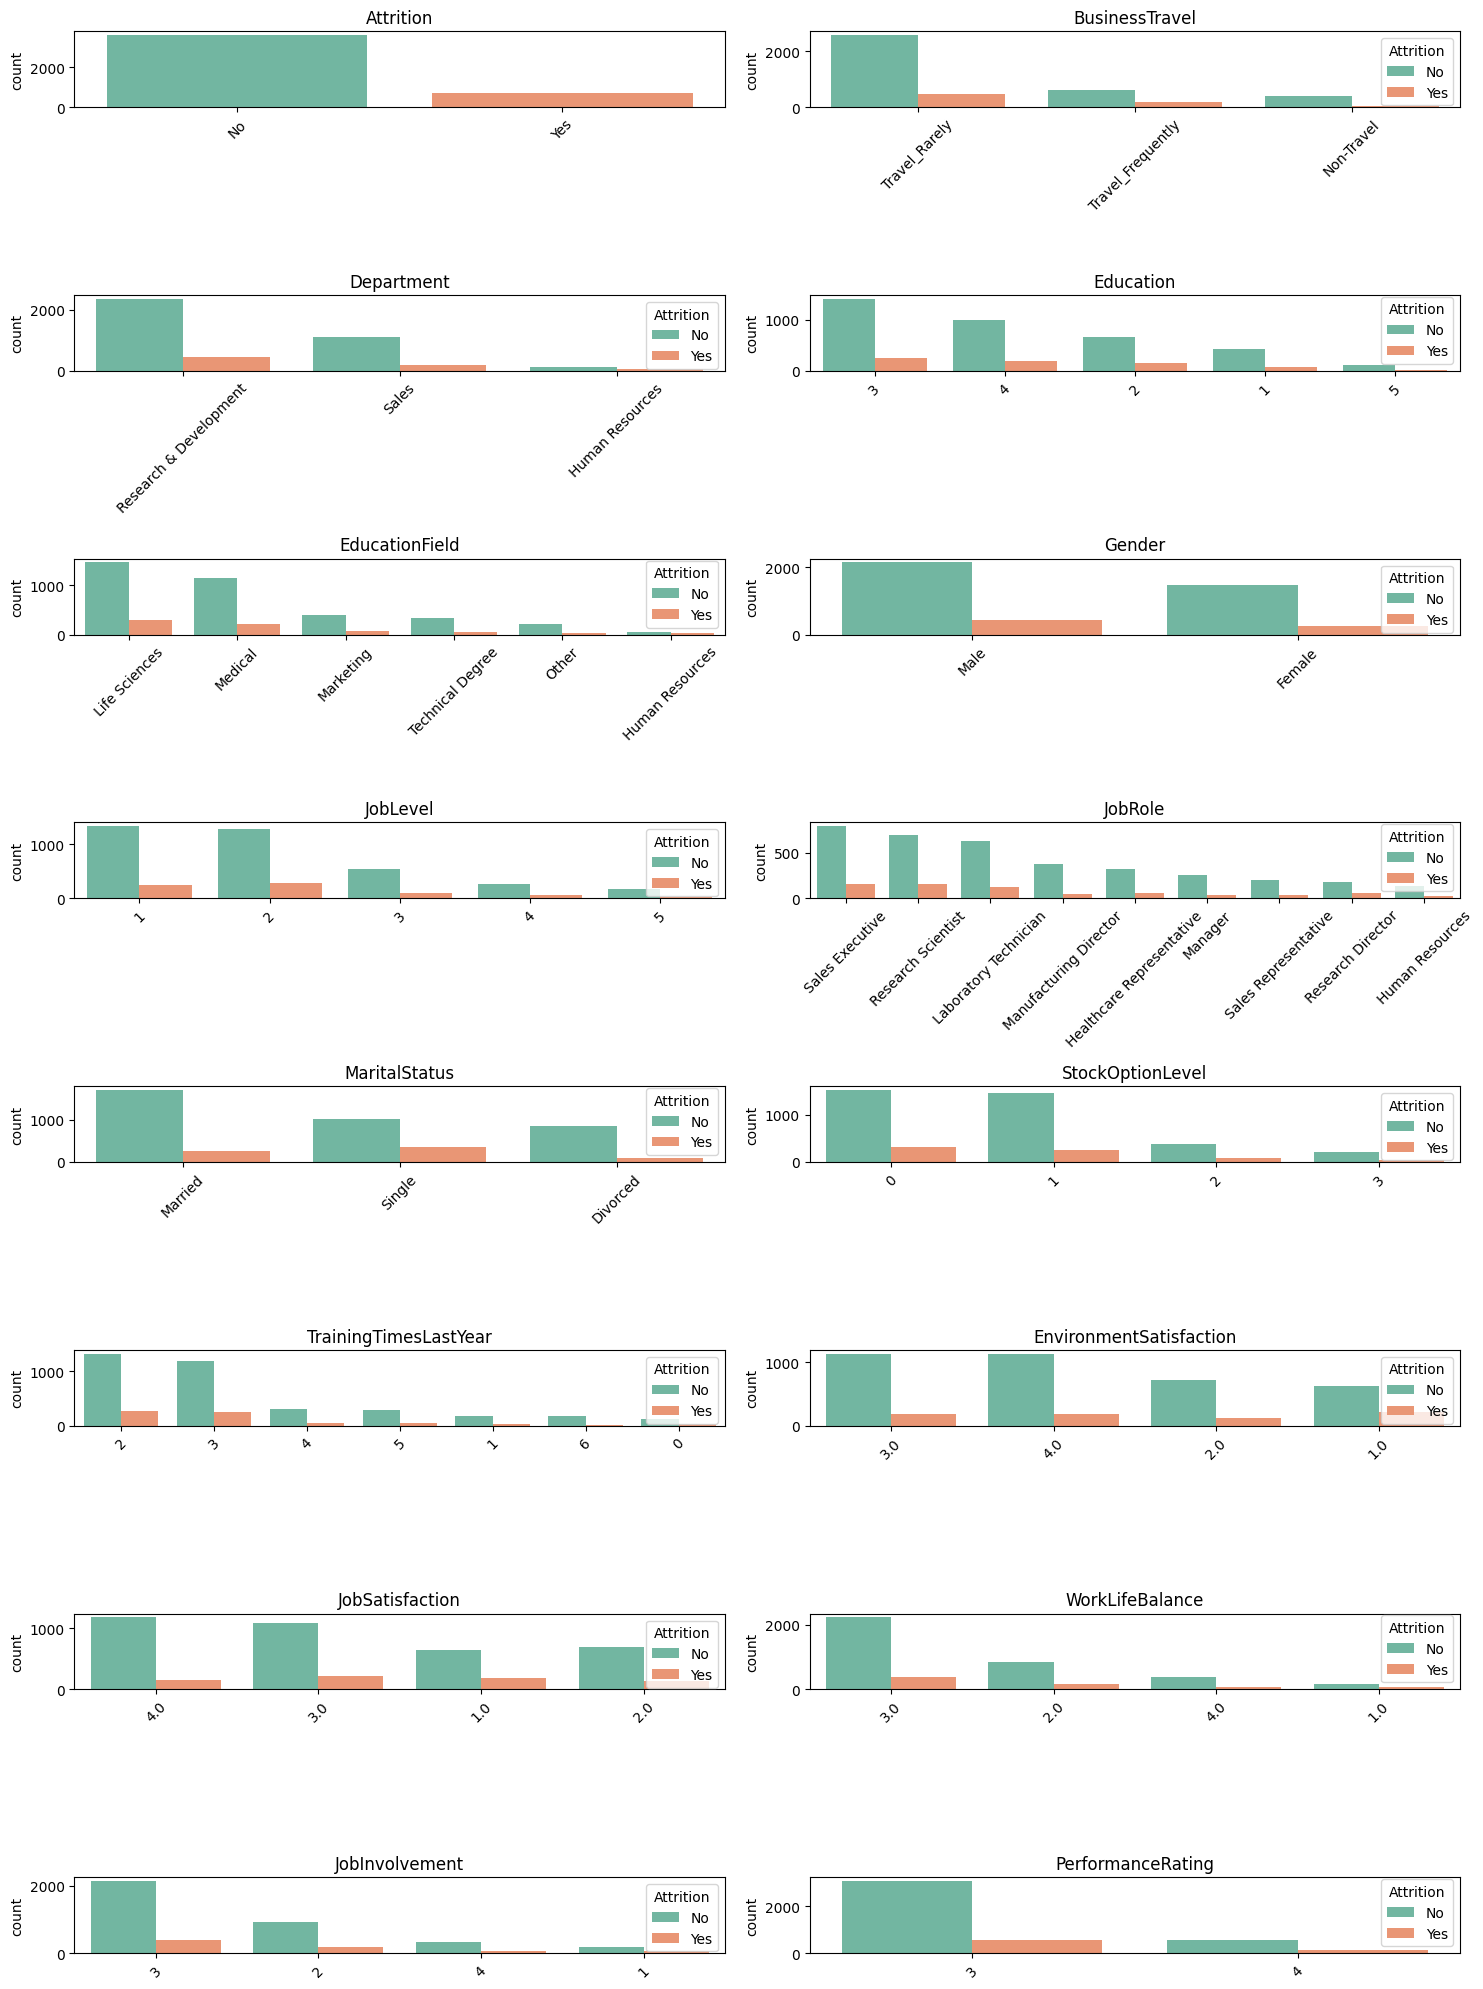

In [30]:
sp.relacion_var_categoricas_problem_cat(df, "Attrition")

- Analicemos ahora la matriz de correlación:

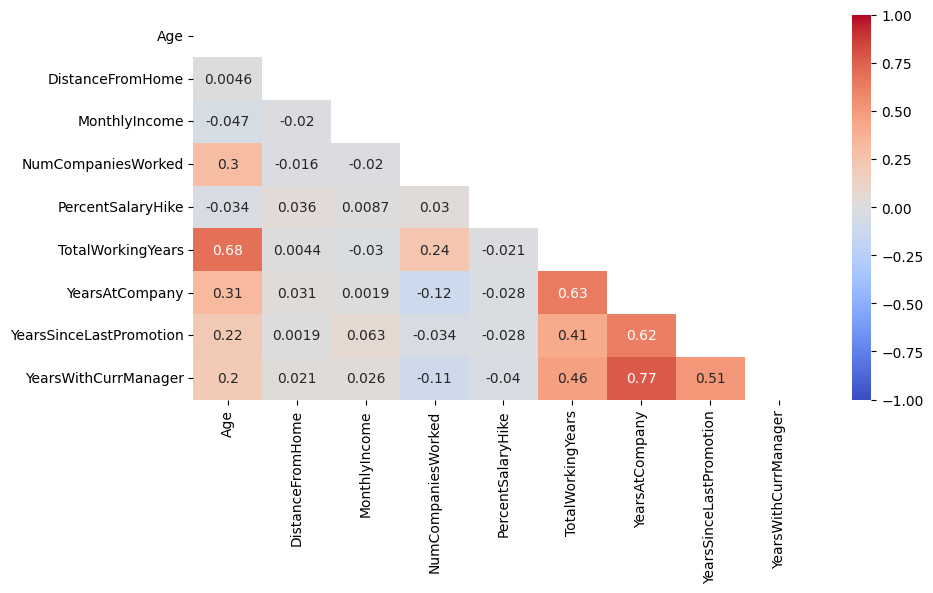

In [31]:
sp.matriz_correlacion(df)

- Identificamos una correlación alta cuando es mayor a 0.6. Las relaciones más fuertes las vemos entre variables como Age y Total Working Years, lo cual tiene sentido dado que, a mayor edad, más años totales de trabajo.

- En una gráfica de correlación, cuando hay dos variables con una relación muy fuerte, nos podemos plantear eliminar una de ellas, por aportar información redudante. En este caso, no tomaremos ninguna decisión inmediata.

- Revisaremos ahora los outliers. 

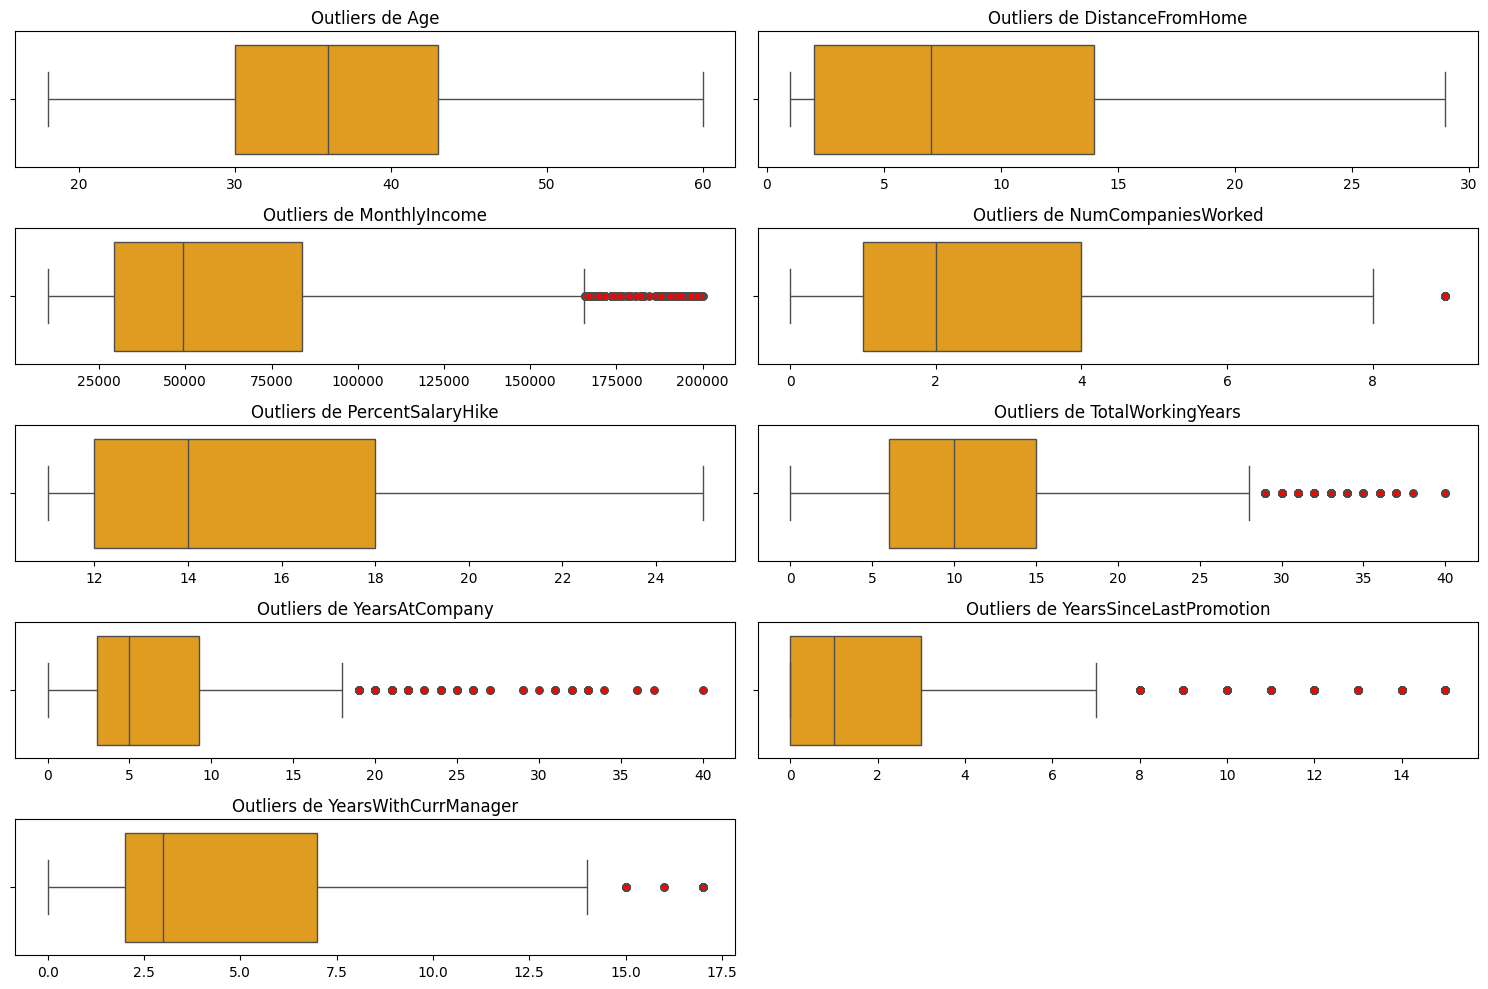

In [32]:
sp.detectar_outliers(df)

In [33]:
df_dupl = df[df.duplicated()]
df_dupl

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1471,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
1472,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
1473,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
1474,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3
1475,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,4,Research Director,Married,40710,3.0,13,0,28.0,5,7,7,7,3.0,2.0,2.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,Single,35390,1.0,18,0,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [34]:
df_dupl2 = df_dupl[df_dupl.duplicated()]

In [35]:
df_dupl2.describe(include="O")

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368
unique,2,3,3,5,6,2,5,9,3,4,7,4,4,4,4,2
top,No,Travel_Rarely,Research & Development,3,Life Sciences,Male,1,Sales Executive,Married,0,2,4.0,4.0,3.0,3,3
freq,1146,970,893,530,558,812,500,304,626,586,505,423,420,827,803,1156


In [36]:
sp.exploracion_dataframe(df_dupl2, "Attrition")

El número de datos es 1368 y el de columnas es 25

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Age,int64
Attrition,object
BusinessTravel,object
Department,object
DistanceFromHome,int64
Education,object
EducationField,object
Gender,object
JobLevel,object
JobRole,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ATTRITION tiene las siguientes valore únicos:


,count
Attrition,
No,1146
Yes,222


La columna BUSINESSTRAVEL tiene las siguientes valore únicos:


,count
BusinessTravel,
Travel_Rarely,970
Travel_Frequently,257
Non-Travel,141


La columna DEPARTMENT tiene las siguientes valore únicos:


,count
Department,
Research & Development,893
Sales,415
Human Resources,60


La columna EDUCATION tiene las siguientes valore únicos:


,count
Education,
3,530
4,374
2,261
1,159
5,44


La columna EDUCATIONFIELD tiene las siguientes valore únicos:


,count
EducationField,
Life Sciences,558
Medical,439
Marketing,151
Technical Degree,120
Other,74


La columna GENDER tiene las siguientes valore únicos:


,count
Gender,
Male,812
Female,556


La columna JOBLEVEL tiene las siguientes valore únicos:


,count
JobLevel,
1,500
2,497
3,207
4,101
5,63


La columna JOBROLE tiene las siguientes valore únicos:


,count
JobRole,
Sales Executive,304
Research Scientist,276
Laboratory Technician,240
Manufacturing Director,134
Healthcare Representative,117


La columna MARITALSTATUS tiene las siguientes valore únicos:


,count
MaritalStatus,
Married,626
Single,444
Divorced,298


La columna STOCKOPTIONLEVEL tiene las siguientes valore únicos:


,count
StockOptionLevel,
0,586
1,552
2,150
3,80


La columna TRAININGTIMESLASTYEAR tiene las siguientes valore únicos:


,count
TrainingTimesLastYear,
2,505
3,460
4,114
5,109
1,67


La columna ENVIRONMENTSATISFACTION tiene las siguientes valore únicos:


,count
EnvironmentSatisfaction,
4.0,423
3.0,415
2.0,266
1.0,264


La columna JOBSATISFACTION tiene las siguientes valore únicos:


,count
JobSatisfaction,
4.0,420
3.0,414
1.0,270
2.0,264


La columna WORKLIFEBALANCE tiene las siguientes valore únicos:


,count
WorkLifeBalance,
3.0,827
2.0,319
4.0,146
1.0,76


La columna JOBINVOLVEMENT tiene las siguientes valore únicos:


,count
JobInvolvement,
3,803
2,356
4,133
1,76


La columna PERFORMANCERATING tiene las siguientes valore únicos:


,count
PerformanceRating,
3,1156
4,212



 ..................... 

Los principales estadísticos de las columnas categóricas para el YES son: 


,count,unique,top,freq
Attrition,222,1,Yes,222
BusinessTravel,222,3,Travel_Rarely,149
Department,222,3,Research & Development,142
Education,222,5,3,82
EducationField,222,6,Life Sciences,94
Gender,222,2,Male,137
JobLevel,222,5,2,86
JobRole,222,9,Research Scientist,52
MaritalStatus,222,3,Single,110
StockOptionLevel,222,4,0,100



 ..................... 

Los principales estadísticos de las columnas numéricas para el YES son: 


,count,mean,std,min,25%,50%,75%,max
Age,222.0,33.860360,9.804116,18.0,28.0,32.0,39.75,58.0
DistanceFromHome,222.0,9.112613,7.816963,1.0,2.0,7.0,15.00,29.0
MonthlyIncome,222.0,61817.837838,45194.705090,10090.0,28462.5,49040.0,71015.00,198590.0
NumCompaniesWorked,222.0,2.950450,2.709506,0.0,1.0,1.0,5.00,9.0
PercentSalaryHike,222.0,15.518018,3.843916,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,222.0,8.391892,7.344437,0.0,3.0,7.0,10.00,40.0
YearsAtCompany,222.0,5.193694,6.093789,0.0,1.0,3.0,7.00,40.0
YearsSinceLastPromotion,222.0,2.022523,3.211185,0.0,0.0,1.0,2.00,15.0
YearsWithCurrManager,222.0,2.905405,3.182968,0.0,0.0,2.0,5.00,14.0



 ..................... 

Los principales estadísticos de las columnas categóricas para el NO son: 


,count,unique,top,freq
Attrition,1146,1,No,1146
BusinessTravel,1146,3,Travel_Rarely,821
Department,1146,3,Research & Development,751
Education,1146,5,3,448
EducationField,1146,6,Life Sciences,464
Gender,1146,2,Male,675
JobLevel,1146,5,1,419
JobRole,1146,9,Sales Executive,252
MaritalStatus,1146,3,Married,543
StockOptionLevel,1146,4,0,486



 ..................... 

Los principales estadísticos de las columnas numéricas para el NO son: 


,count,mean,std,min,25%,50%,75%,max
Age,1146.0,37.547120,8.918944,18.0,31.0,36.0,43.75,60.0
DistanceFromHome,1146.0,9.248691,8.140047,1.0,2.0,7.0,14.00,29.0
MonthlyIncome,1146.0,65686.832461,47364.719518,10510.0,29570.0,49655.0,86165.00,199990.0
NumCompaniesWorked,1146.0,2.633508,2.443434,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1146.0,15.158813,3.639317,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1146.0,11.884817,7.791317,0.0,6.0,10.0,16.00,38.0
YearsAtCompany,1146.0,7.412740,6.146947,0.0,3.0,6.0,10.00,37.0
YearsSinceLastPromotion,1146.0,2.226003,3.250323,0.0,0.0,1.0,3.00,15.0
YearsWithCurrManager,1146.0,4.389180,3.582883,0.0,2.0,3.0,7.00,17.0


- En la gráfica somos capaces de identificar outliers en algunas de las variables numéricas. Para gestionarlos, utilizaremos más adelante el método IFO, dado que, tenemos pocos y claramente distintos del resto del datos.

- Finaliza el EDA guardando el DF sin outliers.

In [ ]:
with open('../../datos/pickles_transformados/modelo1/df_sinnulos.pkl', 'wb') as f:
    pickle.dump(df, f)